In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


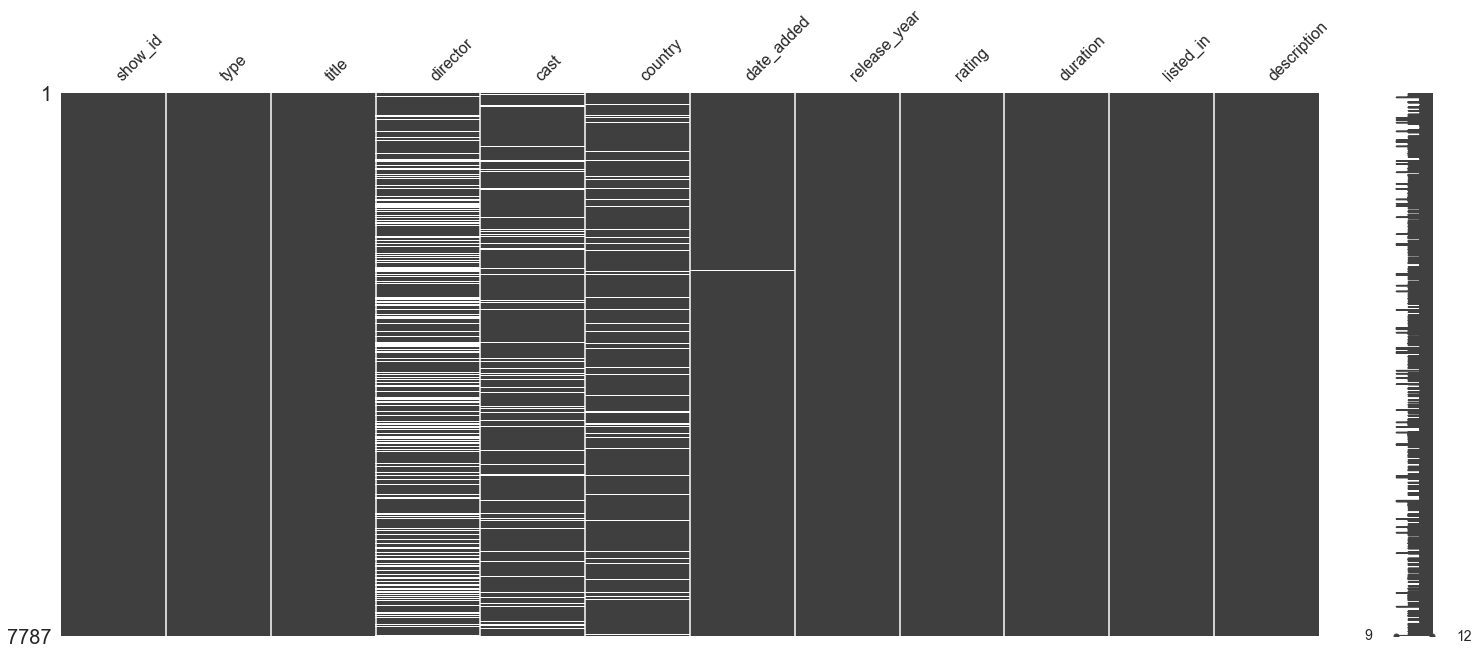

In [18]:
import missingno as miss
miss.matrix(df)

In [19]:

df = df[df['title'].notna()]

#Filling NAN values
df['director'] = df['director'].fillna('Unknown')

df['cast'] = df['cast'].fillna('Unknown')

df['country'] = df['country'].fillna('Not Mentioned')

In [20]:
#Only TV Shows
TV = df[df['type'] == 'TV Show']

#Only Movies
movie = df[df['type'] == 'Movie']

#Sorting rows in descending order according to released year and Data added
TV = TV[TV['release_year'] >= 2015].sort_values(by = ['release_year', 'date_added'], ascending = False)
movie = movie[movie['release_year'] >= 2015].sort_values(by = ['release_year', 'date_added'], ascending = False)

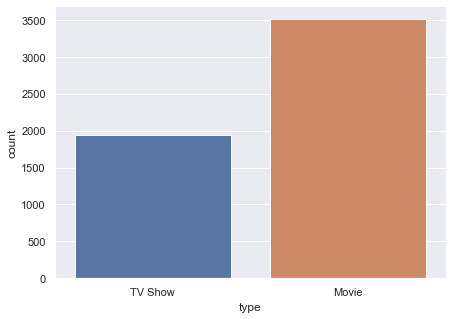

In [21]:
import seaborn as sns

plt.figure(figsize = (7, 5))
sns.set(style = 'darkgrid')
sns.countplot(df['type'][df.release_year >= 2015])

plt.show()

In [22]:
TVorMovie = df[['type', 'director']]
TVorMovie = TVorMovie.pivot_table(index = ['director'], columns = ['type'], aggfunc = len).fillna('...')
TVorMovie.head(10)

type,Movie,TV Show
director,,
A. L. Vijay,2,...
A. Raajdheep,1,...
A. Salaam,1,...
A.R. Murugadoss,2,...
Aadish Keluskar,1,...
Aamir Bashir,1,...
Aamir Khan,1,...
Aanand Rai,2,...
Aaron Burns,1,...


In [23]:
TVnMovie = TVorMovie[TVorMovie['TV Show'] != '...']
TVnMovie[TVnMovie['Movie'] != '...']

type,Movie,TV Show
director,,
Alessandro Angulo,1,1
Anurag Basu,4,1
BB Sasore,1,1
Cosima Spender,2,1
Dan Forrer,1,1
Daniel Kontur,1,1
David Ayer,2,1
Eli Roth,2,1
Estela Renner,1,1


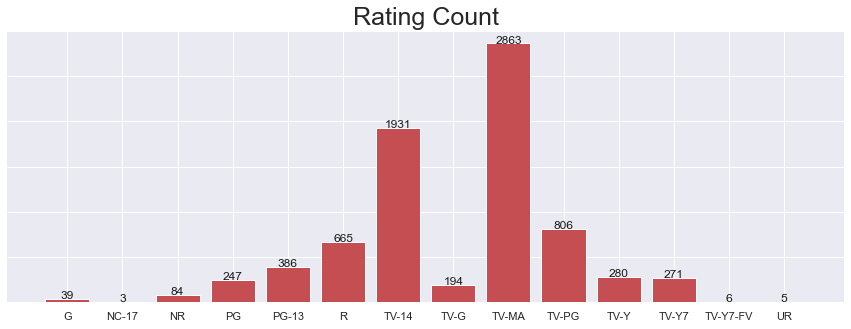

In [24]:
ratingCount = df[['type', 'rating']]
ratingCount = ratingCount.groupby('rating').count()

plt.figure(figsize = (15, 5))
bars = plt.bar(ratingCount.index, ratingCount['type'], color = 'r')
plt.tick_params(axis = 'both', left = False, bottom = False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelleft = False)

plt.title('Rating Count', fontsize = 25)

for i in bars:    
      plt.gca().text(i.get_x() + i.get_width()/2, i.get_height() + 7, 
      str(int(i.get_height())), ha = 'center', color = 'k')
plt.show()

In [25]:
US_Based = df[['type', 'title', 'country', 'rating']].copy()
US_Based['country'] = US_Based['country'].str.extract(r'(United States)+')
US_Based.dropna().sort_values(['type','title']).reset_index(drop = True).head(10)

,type,title,country,rating
0,Movie,#Rucker50,United States,TV-PG
1,Movie,#realityhigh,United States,TV-14
2,Movie,(T)ERROR,United States,NR
3,Movie,1 Chance 2 Dance,United States,TV-PG
4,Movie,1 Mile to You,United States,TV-14
5,Movie,"10,000 B.C.",United States,PG-13
6,Movie,100 Things to do Before High School,United States,TV-Y
7,Movie,100 Years: One Woman's Fight for Justice,United States,TV-14
8,Movie,12 ROUND GUN,United States,TV-MA
9,Movie,13 Cameras,United States,NR


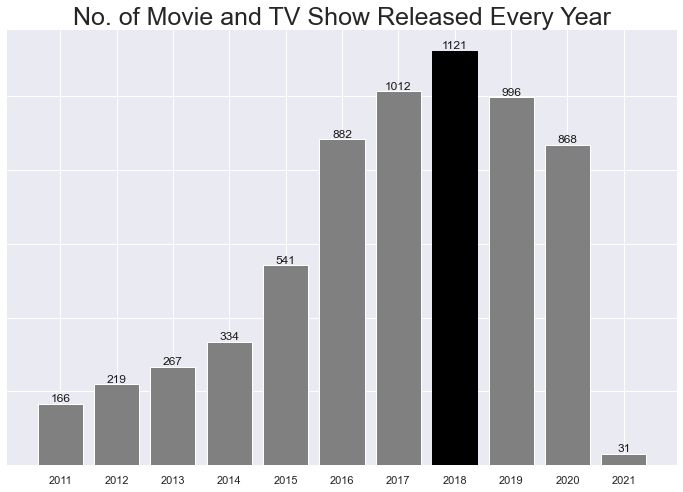

In [26]:
yearCount = df[df['release_year'] > 2010]
yearCount = yearCount.groupby('release_year')['release_year'].apply(len)

plt.figure(figsize = (12, 8))
bars = plt.bar(yearCount.index.tolist(), yearCount.values.tolist(), color = 'grey')

plt.tick_params(axis = 'both', left = False, bottom = False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelleft = False)

plt.xticks(yearCount.index.tolist())
plt.title('No. of Movie and TV Show Released Every Year', fontsize = 25)

bars[7].set_color('black')
for i in bars:    
      plt.gca().text(i.get_x() + i.get_width()/2, i.get_height() + 7, 
      str(int(i.get_height())), ha = 'center', color = 'k')

plt.show()